In [1]:
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import json
import math
import numpy as np


# plt.rc('text', usetex=True)

{'a)': <Axes: label='a)'>, 'b)': <Axes: label='b)'>}


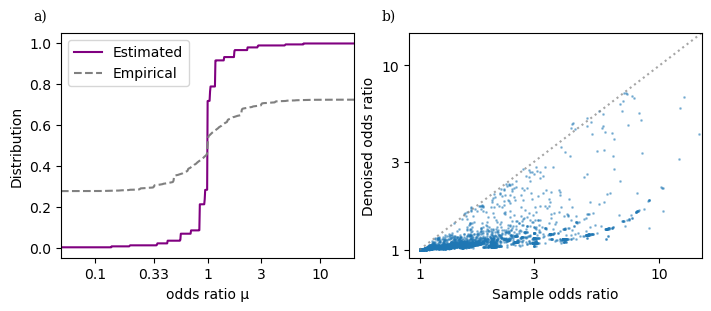

In [13]:
fig, axs = plt.subplot_mosaic([['a)', 'b)']],
                              layout='constrained', figsize=(7, 3))
print(axs)
for label, ax in axs.items():
    # label physical distance to the left and up:
    trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize='medium', va='bottom', fontfamily='serif')


prior_support = np.load('../output/prior_support.npy')
log_OR_cdf = np.load('../output/log_OR_cdf.npy')
estimated_cdf = np.load('../output/estimated_cdf.npy')

axs['a)'].plot(prior_support, estimated_cdf, label="Estimated", color="purple")
axs['a)'].plot(prior_support, log_OR_cdf, "--", label="Empirical", color="grey")


axs['a)'].set_xlim(-3, 3)
axs['a)'].set_xticks(
    [-math.log(10), -math.log(3), 0, math.log(3), math.log(10)],
    ["0.1", "0.33", "1", "3", "10"]
)
axs['a)'].legend()
axs['a)'].set_ylabel("Distribution")
axs['a)'].set_xlabel("odds ratio μ")


log_ORs = np.load('../output/log_ORs.npy')
postmeans = np.load('../output/postmeans.npy')

# b = plot(
#     abs.(log_ORs),
#     abs.(postmeans),
#     seriestype = :scatter,
#     alpha = 0.4,
#     markerstrokealpha = 0,
#     markersize = 1,
#     xlim = (-0.1, 3.45),
#     ylim = (-0.1, 3.45),
#     label = "",
    # xlabel = "Sample odds ratio",
#     ylabel = "Denoised odds ratio",
#     yticks = ([0, log(3), log(10), log(30)], ["1", "3", "10", "30"]),
#     xticks = ([0, log(3), log(10), log(30)], ["1", "3", "10", "30"]),
# )

# plot!(b, [0, 3.45], [0, 3.45], linestyle = :dot, color = :grey, alpha = 0.7, label = "")


axs['b)'].scatter(np.abs(log_ORs), np.abs(postmeans), 
                   alpha=0.4, s=1, rasterized=True)
axs['b)'].plot([0, 3.45], [0, 3.45], ":", label="", color="grey", alpha=0.7)

axs['b)'].set_xlim(-0.1, math.log(15))
axs['b)'].set_ylim(-0.1, math.log(15))
axs['b)'].set_xticks(
    [0, math.log(3), math.log(10)],
    ["1", "3", "10"]
)
axs['b)'].set_yticks(
    [0, math.log(3), math.log(10)],
    ["1", "3", "10"]
)
axs['b)'].set_ylabel("Denoised odds ratio")
axs['b)'].set_xlabel("Sample odds ratio")



fig.savefig('../output/figure1.pdf')

